# Visualizations Using Python, Bokeh and Matplotlib

This notebook serves to detail, create and visualize the charts necessary for our ECE 143 final presentation. It will utilize packages such as Matplotlib, Bokeh and Pandas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
from math import pi
import numpy as np
import datetime as DT
import bokeh
from bokeh.plotting import figure, show, output_notebook, output_file, gmap
from bokeh.models import NumeralTickFormatter, ColumnDataSource, GMapOptions, Circle, Range1d
import re
import ModuleVisualization as mv

## Outline <a id='outline'></a>

[Data Prep](#data)

1. [Radar Plots](#1) 
    1. [Using our defined characteristics](#1a)  
        1. Average Attack
        2. Average Midfield
        3. Average Defender
        4. Average Goalkeeper
    2. [Using Machine Learned characteristics](#1b)
        1. Average Attack
        2. Average Midfield
        3. Average Defender
        4. Average Goalkeeper
    3. [Choose random player, find position](#1d)
    
2. [Bar Plots](#2)
    1. [Wage vs Age](#2a)
    
3. [Line Plot](#3)
    1. [Skill & Potential VS Age](#3a)
    2. [Positions: Wage VS Age : W/o major players](#3b)
    
4. [Scatter Plots](#4)
    1. [Wage of the player VS Skill of the player](#4a)
    2. [Value of the player VS Skill of the player](#4b)
    3. [Height VS Skill (Goalkeepers)](#4c)
    4. [Value Vs Age VS Skill](#4e)
    
5. [Heat Map (Similarity Matrix)](#5)

6. [World Map](#6)
    1. [Where is the money?](#6a)
    2. [Where are the players coming from?](#6b)




## Code + Charts

### Data Preparation <a id='data'></a>

In [2]:
#read file
df1 = pd.read_csv('players11.csv') #top 480 players
df2 = pd.read_csv('players12.csv') #~8000 players
df3 = pd.read_csv('players14.csv') #10000 players

#Master Dataframe ==> df
frames = [df1,df2]
df = pd.concat(frames,ignore_index=True)

#Mega Dataframe ==> mdf
frames = [df1,df2,df3]
mdf = pd.concat(frames,ignore_index=True)

mapping = {'RM':'Midfield',
'GK': 'Goalkeeper',
'CB': 'Defense',
'LCB':'Defense',
'RCB': 'Defense',
'LB':'Defense',
'RB': 'Defense',
'RWB': 'Defense',
'LWB': 'Defense',
'CM' : 'Midfield',
'LDM': 'Midfield',
'LAM': 'Midfield',
'RDM': 'Midfield',
'RAM': 'Midfield',
'RCM' : 'Midfield',
'LCM' : 'Midfield',
'CDM': 'Midfield',
'CAM': 'Midfield',
'LM' : 'Midfield',
'RM' : 'Midfield',
'ST': 'Attack',
'CF': 'Attack',
'LW': 'Attack',
'RW': 'Attack',
'RS': 'Attack',
'LS' : 'Attack'}







print 'Data Acquired'

Data Acquired


[Go Back To Outline](#outline)

### 1. Radar Plot  <a id='1'></a>

#### A. Using Our Defined Characteristics <a id='1a'></a>

/Users/SanjaytheSellout/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


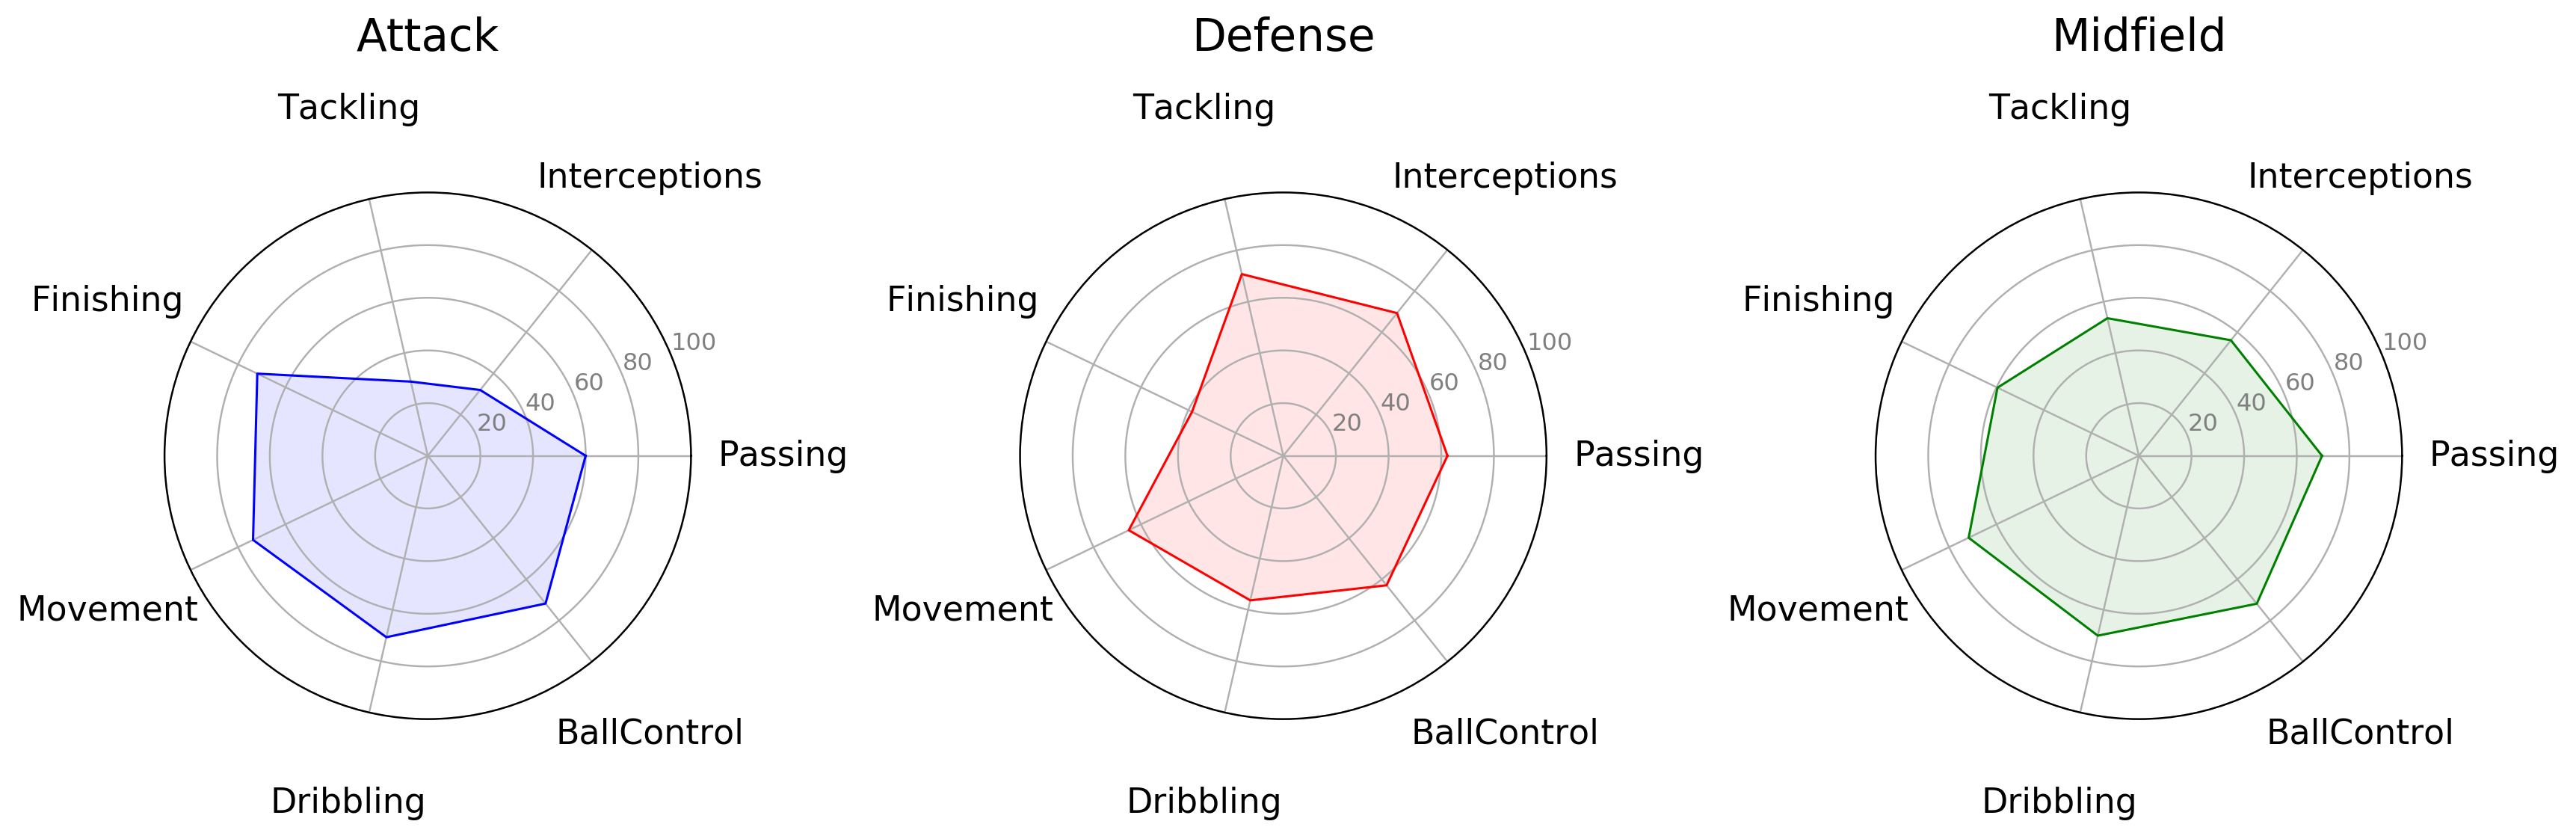

In [3]:
df_1a = df.copy()
#group parameters together
df_1a['Tackling'] = df_1a[['SlidingTackle','StandingTackle']].mean(axis=1)
df_1a['Passing'] = df_1a[['LongPassing','ShortPassing']].mean(axis=1)
df_1a['Movement'] = df_1a[['Acceleration','SprintSpeed','Agility']].mean(axis=1)

#comment out to keep goalkeepers in plot
df_1a = mv.drop_player(df_1a,'club_pos','GK')

#make sure to keep club_pos in the attributes selected!
Attributes = ['Passing','Interceptions','Tackling','Finishing','Movement','Dribbling','BallControl','club_pos']

outfile = 'radar_plot_user.png'
textsize = 15
p = mv.radar_plot(df_1a,Attributes,mapping,outfile,textsize)
p.show()

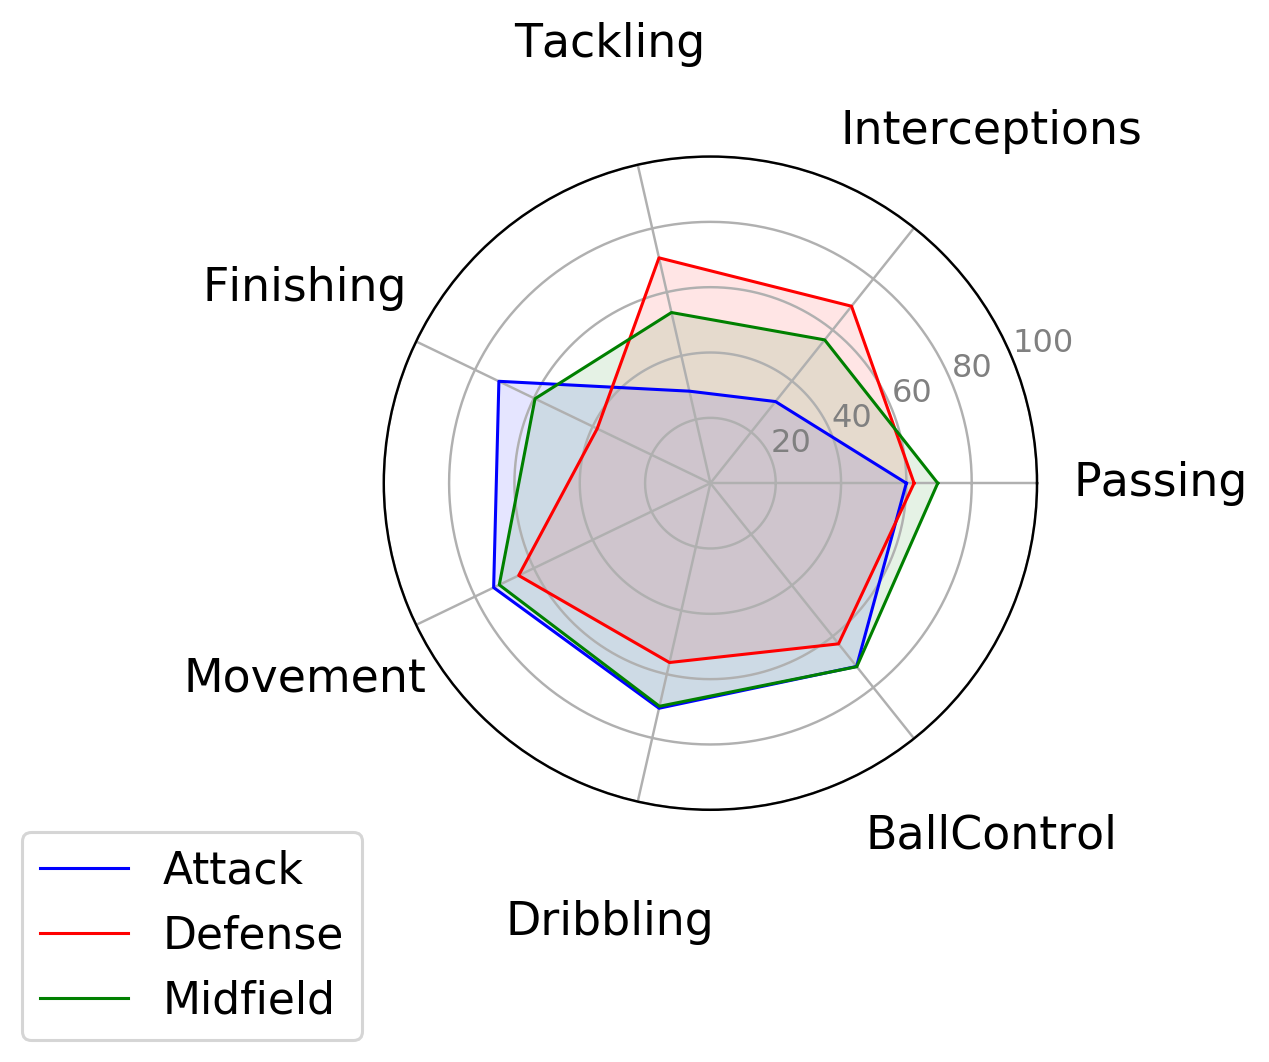

In [4]:
#plot single radar plot, either individual or overlayed

#leave position as None to get overlayed plot

position = None

outfile = 'radar_plot_single.png'
textsize = 15
p = mv.radar_plot_single(df_1a,Attributes,mapping,outfile,textsize,position)
p.show()

### [Go Back To Outline](#outline)

#### B. Using Machined-Learned Characteristics <a id='1b'></a>

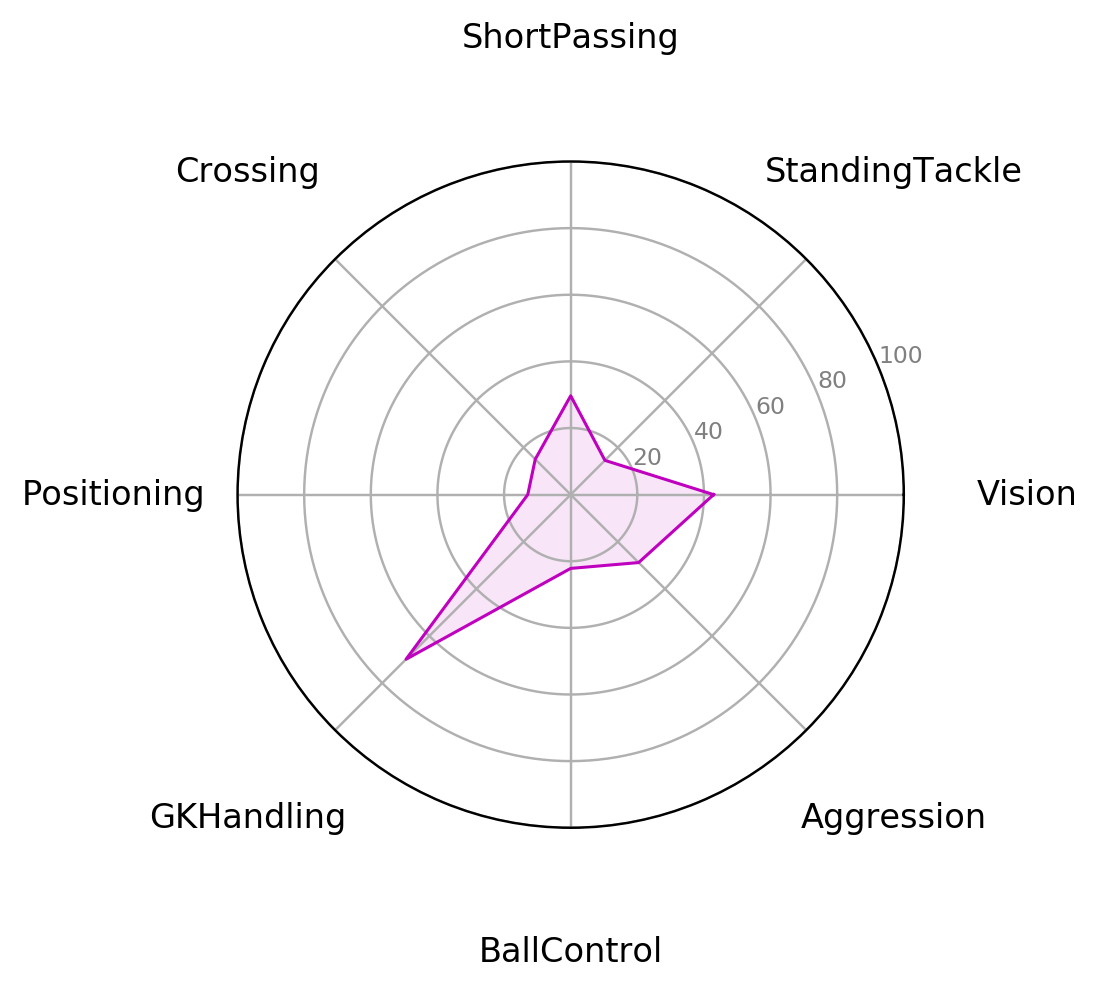

In [5]:
df_1b = df.copy()
Attributes2 = ['Vision',
 'StandingTackle',
 'ShortPassing',
 'Crossing',
 'Positioning',
 'GKHandling',
 'BallControl',
 'Aggression','club_pos']
textsize = 11
position = 'Goalkeeper'
outfile = 'radar_plot_ml.png'
p = mv.radar_plot_single(df_1b,Attributes2,mapping,outfile,textsize,position)
p.show()

[Go Back To Outline](#outline)

#### C. Choose Random Player, Find Position <a id='1d'></a>

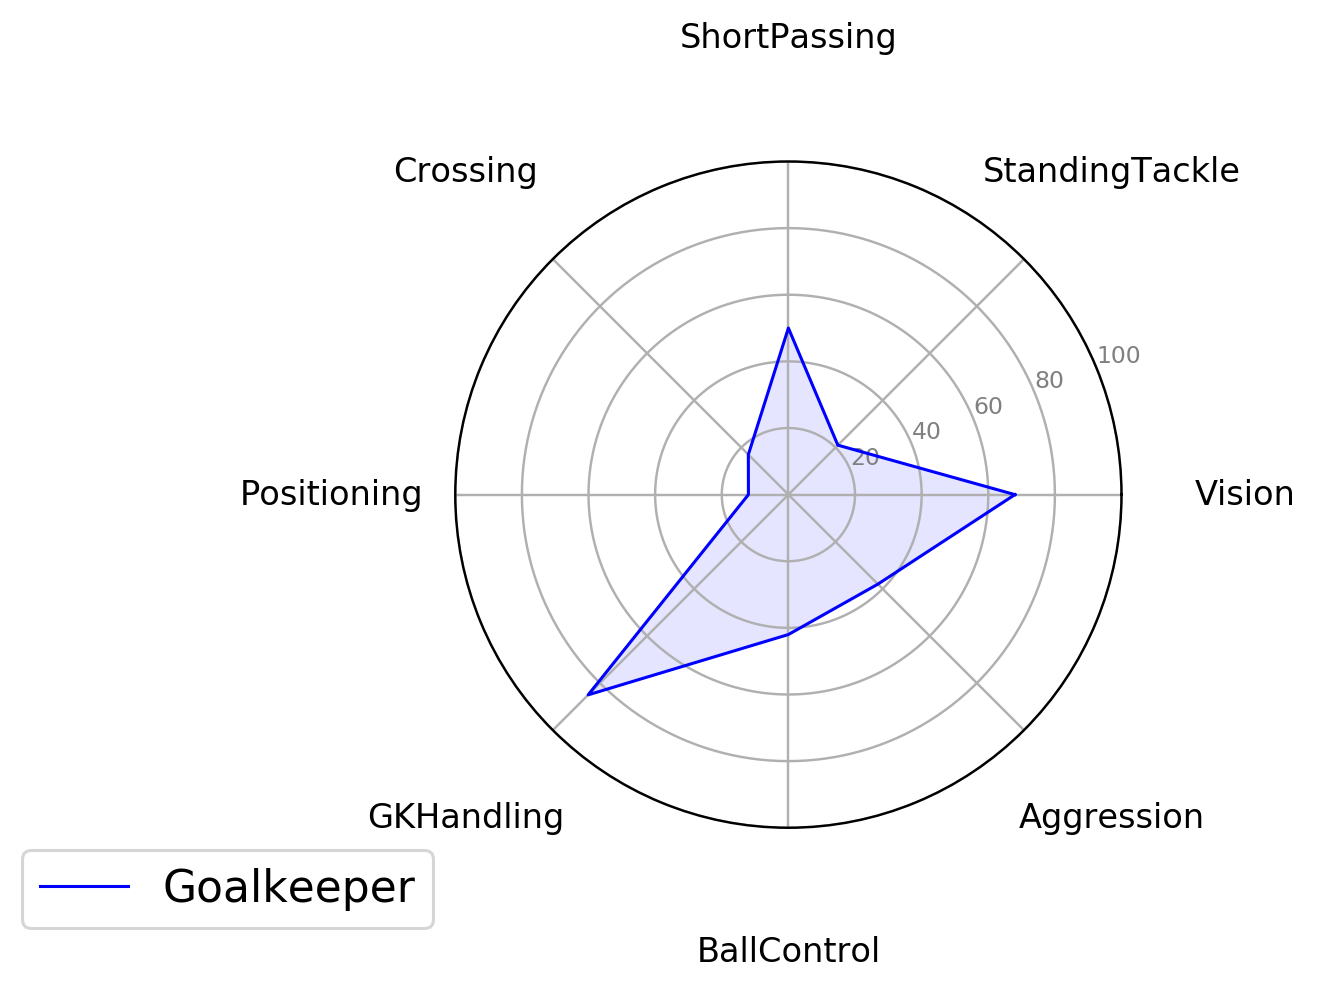

In [6]:
df_1c = df.copy()
df_1c = mv.get_player(df_1c,'full_name','De Gea')
textsize = 11
position = None
outfile = 'radar_plot_individual.png'
p = mv.radar_plot_single(df_1c,Attributes2,mapping,outfile,textsize,position)
p.show()

[Go Back To Outline](#outline)

### 2. Bar Plots <a id='2'></a>

#### A. Y vs X <a id='2a'></a>

In [7]:
"""
bar plots showing y vs x

"""
from bokeh.plotting import figure, show, output_notebook
import numpy as np
df_2a = df.copy()
df_2a = mv.drop_player(df_2a,'club_pos','GK')
x = 'height'
y = 'Agility'
p = mv.bar_plot(df_2a,x,y)
p.xaxis.axis_label = 'Height (cm)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 3. Line Plots <a id='3'></a>

#### A. Skill & Potential VS Age <a id='3a'></a>

In [8]:
# library
import bokeh
from bokeh.plotting import figure, output_notebook, show
import numpy as np
import matplotlib.pyplot as plt

"""
line chart showing 
Skill & Potential VS Age

"""
#select y and x
y1 = 'rating'
y2 = 'potential'
x = 'age'

df_3a = df1.copy()

p = mv.line_plot(df_3a,x,y1,y2)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### B & C. Positions: Wage VS Age : With & without major players <a id='3b'></a>

In [9]:
# library
import bokeh
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

y = 'wage'
x = 'age'

df_3b = df1.copy()
#drop top players
#df_3b = mv.drop_player(df_3b,'full_name','Cristiano Ronaldo')
#df_3b = mv.drop_player(df_3b,'full_name','L. Messi')

p = mv.line_plot_pos(df_3b,x,y,mapping)
p.yaxis.axis_label = 'Wage (€/week)'
p.xaxis.axis_label = 'Age (years)'
p.x_range=Range1d(18,36)
p.y_range=Range1d(0,300000)
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 4. Scatter Plots <a id='4'></a>

#### A. Wage VS Skill <a id='4a'></a>

In [10]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing skill/rating vs wage
showing all players and mean

"""
df_4a = df.copy()
x = 'rating'
y = 'wage'
p = mv.scatter_plot(df_4a,x,y)
p.yaxis[0].formatter = NumeralTickFormatter(format="000,000")
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Wage (€/week)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### B. Value VS Skill <a id='4b'></a>

In [11]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing skill/rating vs value
showing all players and mean

"""
df_4b = df1.copy()
x = 'rating'
y = 'value'
p = mv.scatter_plot(df_4b,x,y)
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Value (Millions of Euros)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### C. Height VS Skill (Goalkeeper)  <a id='4c'></a>

In [12]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import NumeralTickFormatter

"""
scatter plot showing height vs rating
showing only goalkeepers

"""

df_4c = mdf.copy()
df_4c = mv.drop_player(df_4c,'club_pos','GK')
x = 'rating'
y = 'height'
p = mv.scatter_plot(df_4c,x,y)
p.xaxis.axis_label = 'Overall Skill Rating'
p.yaxis.axis_label = 'Height (cm)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

#### D. Value VS Age VS Skill <a id='4e'></a>

In [13]:
import bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Circle, NumeralTickFormatter

"""
bubble and scatter
"""
df_4d = df1.copy()
x = 'rating'
y = 'value'
z = 'age'
p = mv.bubble_scatter_plot(df_4d,x,y,z)
p.yaxis.axis_label = 'Values (Millions of Euros)'
show(p)

Loading BokehJS ...

[Go Back To Outline](#outline)

### 5. Heat Map  <a id='5'></a>

Check out SimilarityMatrix.ipynb!

[Go Back To Outline](#outline)

### 6. World Map <a id='6'></a>

#### A. Where Is The Money? <a id='6a'></a>

In [14]:
df_6a = mdf.copy()
norm = 0.0004
outfile = 'wheremoney.html'
p = mv.world_map_plot(df_6a,norm,outfile,True,'red',0.4)
show(p)

                         wage
                         mean
country                      
Argentina        25666.666667
Australia        10100.000000
Austria          15571.428571
Belgium          12421.052632
Bolivia           5500.000000
Cameroon         16500.000000
Chile            17692.307692
Colombia         22500.000000
Czech Republic   15000.000000
Denmark          11888.888889
Ecuador          22000.000000
Egypt            17600.000000
England          76789.473684
Finland           1000.000000
France           52807.692308
Germany          61091.954023
Greece            3363.636364
Iceland          14000.000000
Italy            63275.862069
Ivory Coast      19250.000000
Mexico           29272.727273
Netherlands      22347.826087
New Zealand       2750.000000
Norway            9857.142857
Paraguay         24875.000000
Peru             14111.111111
Poland            6750.000000
Portugal         17833.333333
Russia           42853.658537
Saudi Arabia     25578.947368
Scotland  

[Go Back To Outline](#outline)

#### B. Where Do Good Players Come From? <a id='6b'></a>

In [15]:
from ModuleVisualization import world_map_plot
df_6b = mdf.copy()
norm = 0.008
outfile = 'wheregood.html'
p = mv.world_map_plot(df_6b,norm,outfile,False,'red')
show(p)

country
Argentina               750
Australia               248
Austria                 278
Belgium                 444
Bolivia                  19
Brazil                  342
Bulgaria                 23
Cameroon                 21
Canada                   22
Chile                   329
China PR                 23
Colombia                513
Czech Republic           45
Denmark                 366
Ecuador                  18
Egypt                    18
England                2373
Finland                  48
France                 1117
Germany                1501
Greece                  117
Hungary                  23
Iceland                  22
India                    23
Italy                  1068
Ivory Coast              19
Japan                   495
Korea Republic          329
Mexico                  471
Netherlands             507
New Zealand              19
Northern Ireland         21
Norway                  393
Paraguay                 13
Peru                     14
Poland      

[Go Back To Outline](#outline)